## - MSE가 가장 작았던 elastic regression model

In [1]:
library(glmnet)
total <- read.csv('total_dat.csv')

Loading required package: Matrix

Loaded glmnet 4.0-2



In [2]:
total_sub <- subset(total, select = -c(geometry,가장동,갈곶동,고현동,궐동,금암동,내삼미동,부산동,누읍동,벌음동,부산동,서동,서랑동,
                                세교동,수청동,양산동,오산동,외삼미동,원동,은계동,지곶동,청학동,청호동,탑동,
                                광성초양산초병점초공동통학구역,광성초통학구역,금암초통학구역,대호초성산초공동통학구역,
                                대호초통학구역,매홀초삼미분교수청초필봉초공동통학구역,매홀초삼미분교장통학구역,매홀초통학구역,
                                문시초통학구역,성산초통학구역,성호초운암초공동통학구역,성호초통학구역,세미초통학구역,수청초통학구역,
                                양산초통학구역, 오산고현초오산원당초공동통학구역,오산고현초통학구역,오산대원초원동초공동통학구역,오산대원초통학구역,
                                오산원당초통학구역,오산원일초통학구역,오산초가수초공동통학구역,오산초통학구역,운산초통학구역,운암초통학구역,
                                원동초통학구역,필봉초통학구역,화성초통학구역))

In [3]:
total_sub

,accident_cnt,gid,고령인구_count_100,생산가능인구_count_100,신호등_sum,유동인구_sum,유소년인구_count_100,유소년인구_count_200,주정차_count_300,차량등록_count_200,⋯,유치원_count_200,정류장_count_100,정류장_count_300,초등학교_count,초등학교_count_100,초등학교_count_200,동.raw,학구.raw,정류장_count_200,총인구_count_100
,<int>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>
1,1,다사561083,0,0,0,43.4356758,0,0,2,0,⋯,0,2,2,0,0,0,서랑동,광성초통학구역,2,0
2,1,다사564096,0,0,0,9.6334167,0,0,2,0,⋯,0,0,2,0,0,0,양산동,광성초양산초병점초공동통학구역,0,0
3,1,다사566102,0,0,0,0.2155000,0,0,2,0,⋯,0,0,2,0,0,0,양산동,광성초양산초병점초공동통학구역,1,0
4,1,다사583093,0,13,0,0.6620000,0,0,0,1,⋯,0,0,0,0,0,0,지곶동,광성초통학구역,0,13
5,1,다사584072,0,0,8,8.1043333,0,0,6,0,⋯,0,1,6,0,0,0,가장동,대호초성산초공동통학구역,4,0
6,1,다사585098,20,124,0,2.7512538,30,30,0,0,⋯,1,0,0,0,0,0,세교동,광성초통학구역,0,176
7,1,다사586106,33,374,0,20.5715000,81,411,10,0,⋯,0,0,10,0,0,0,양산동,양산초통학구역,3,497
8,1,다사587044,0,0,0,2.9041833,0,6,3,0,⋯,0,0,3,0,0,0,벌음동,오산초가수초공동통학구역,3,0
9,1,다사587072,0,0,7,8.5702076,0,0,6,0,⋯,0,0,6,0,0,0,가장동,대호초성산초공동통학구역,3,0


In [4]:
dim(total_sub)

[1] 345  32

In [5]:
dim(total_sub[,c(-1,-2)])

[1] 345  30

In [6]:
x <- model.matrix(accident_cnt~.,total_sub[,-2])[,-1]
y <- total_sub$accident_cnt

In [7]:
x;y

,고령인구_count_100,생산가능인구_count_100,신호등_sum,유동인구_sum,유소년인구_count_100,유소년인구_count_200,주정차_count_300,차량등록_count_200,학원수_count_100,학원수_count_300,⋯,학구.raw오산원일초통학구역,학구.raw오산초가수초공동통학구역,학구.raw오산초통학구역,학구.raw운산초통학구역,학구.raw운암초통학구역,학구.raw원동초통학구역,학구.raw필봉초통학구역,학구.raw화성초통학구역,정류장_count_200,총인구_count_100
1,0,0,0,43.4356758,0,0,2,0,0,0,⋯,0,0,0,0,0,0,0,0,2,0
2,0,0,0,9.6334167,0,0,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.2155000,0,0,2,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0
4,0,13,0,0.6620000,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,13
5,0,0,8,8.1043333,0,0,6,0,0,0,⋯,0,0,0,0,0,0,0,0,4,0
6,20,124,0,2.7512538,30,30,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,176
7,33,374,0,20.5715000,81,411,10,0,0,0,⋯,0,0,0,0,0,0,0,0,3,497
8,0,0,0,2.9041833,0,6,3,0,0,0,⋯,0,1,0,0,0,0,0,0,3,0
9,0,0,7,8.5702076,0,0,6,0,0,0,⋯,0,0,0,0,0,0,0,0,3,0
10,24,53,0,9.2165167,0,11,3,0,0,0,⋯,0,0,0,0,0,0,0,0,2,84


[1]  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  2  1  1  1  1  2  1
 [26]  2  1  1  2  1  1  1  1  2  3  3  4  1  1  1  1  2  1  1  3  1  1  1  3  1
 [51]  2  3  2  1  1  1  3  2  2  2  1  1  1  1  1  1  2  1  1  1  1  1  1  1  3
 [76]  2  1  2  2  1  1  1  1  1  1  1  3  1  1  2  1  1  1  1  2  1  1  1  1  1
[101]  1  2  1  1  3  1  1  1  3  1  4  2  1  1  1  1  1  2  2  1  1  1  1  5  1
[126]  1  2  1  1  1  1  5  2  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1
[151]  6  1  1  3  2  1  1  3  2  1  1  3  3  1  1  1  1  1  1  4  1  1  1  1  1
[176]  2  2  1  1  2  1  1  1  2  1  3  1  1  1  2  1  1  1  1  5  1  1  1  1  2
[201]  2  4  2  1  1  1  1  1  1  1  1  1  3  1  2  2  1  2  1  1  1  1  1  1  1
[226]  1  2  1  2  1  1  2  1  2  1  2  1  7  1  1  2  1  1  1  2  5  2  1  1  1
[251]  1  3  1 10  1  1  3  2  5  1  1  1  1  2  1  1  4  2  1  2  1  1  1  2  3
[276]  1  2  3  1  1  2  1  1  1  1  2  1  6  1  3  1  1  1  1  5  5  1  2  1  6
[301]  1  3  2  3  2  4  1  1  1  2  2  4  1  1  1  1  1  2  1  1  1  1  2  1  1
[326]  1  2  1  1  2  1  1  2  1  1  1  1  1  1  3  1  1  1  1  1

In [8]:
# Split Train/Test Set
set.seed(2021)
train<-sample(1:nrow(x),nrow(x)*0.8) 
test<-(-train)
y.test<-y[test]

In [9]:
grid=10^seq(10,-2,length=100) 
elastic.mod <- glmnet(x,y,alpha=0.5, lambda=grid) # ridge > alpha = 0
dim(coef(elastic.mod))

[1]  81 100

Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”


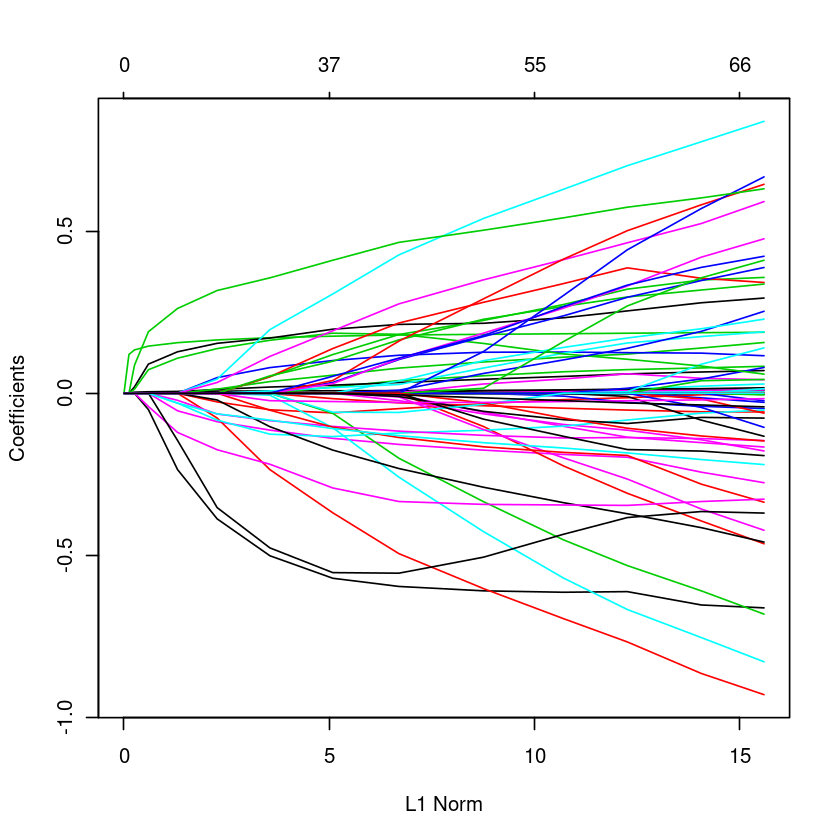

In [10]:
plot(elastic.mod)

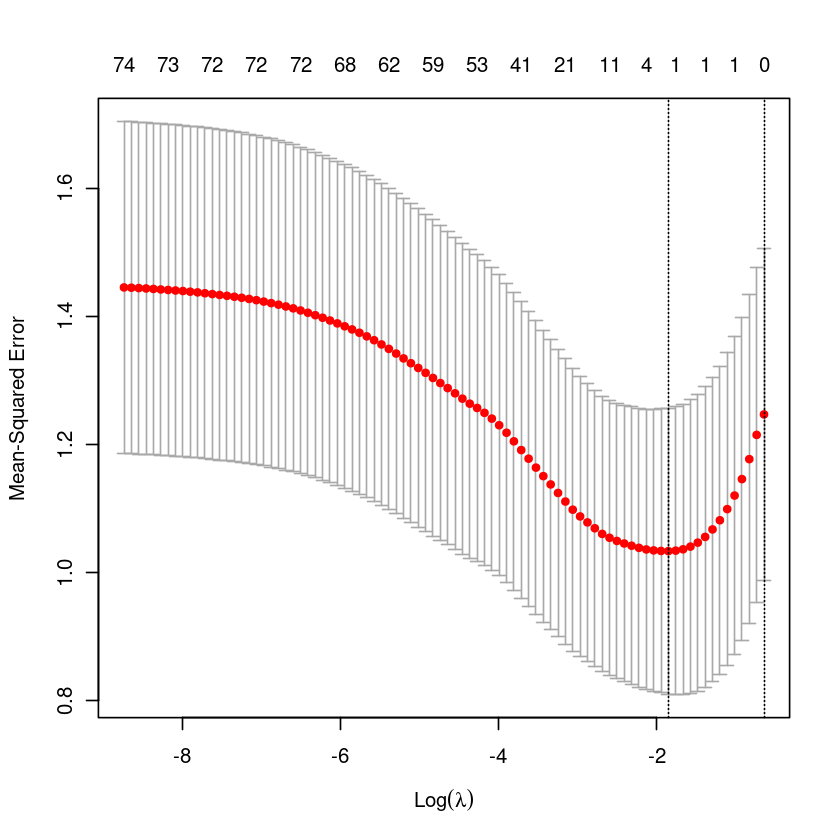

In [11]:
set.seed(2021)
cv.elastic<-cv.glmnet(x[train,],y[train],alpha=1)
plot(cv.elastic)

In [12]:
bestlam.elastic<-cv.elastic$lambda.min
bestlam.elastic

[1] 0.157172

In [13]:
elastic.pred<-predict(elastic.mod,s=bestlam.elastic,newx=x[test,])
mean((elastic.pred-y.test)^2) # MSE

[1] 0.8861524

In [ ]:
##### 이전 파이썬 파일에서 작성훈 후보사고격자 file 불러오기

In [14]:
candidate <- read.csv('candidate_grid.csv')

In [15]:
# 주의 : 다시 실행하려면 위의 셀까지 같이 실행하기
candidate <- candidate[-1]
head(candidate)

,gid,accident_cnt,geometry,cut,동.구분,해당.동.유동인구.총수,해당.동.유동인구.격자수,해당.격자.내부.유동인구
,<fct>,<int>,<fct>,<int>,<fct>,<dbl>,<int>,<dbl>
1,다사590098,2,"MULTIPOLYGON (((127.0380752070758 37.186079749999, 127.0380697170953 37.18698113517717, 127.0391963430494 37.18698552231456, 127.0392018196412 37.18608413699395, 127.0380752070758 37.186079749999)))",1,세교동,4708.502,846,65.33267
2,다사593087,2,"MULTIPOLYGON (((127.0415149774566 37.17617762808073, 127.0415095303094 37.17707901520481, 127.0426360097502 37.17708336864973, 127.0426414435152 37.17618198138427, 127.0415149774566 37.17617762808073)))",1,금암동,2758.588,723,56.89308
3,다사593100,2,"MULTIPOLYGON (((127.0414441456311 37.18789564991838, 127.0414386953315 37.18879703524654, 127.0425653487942 37.18880139052944, 127.0425707857039 37.18790000505989, 127.0414441456311 37.18789564991838)))",1,세교동,4708.502,846,110.78867
4,다사594093,2,"MULTIPOLYGON (((127.0426088372975 37.18159030290482, 127.0426034020813 37.18249168934141, 127.0437299620693 37.18249603292386, 127.0437353838998 37.18159464634623, 127.0426088372975 37.18159030290482)))",1,세교동,4708.502,846,27.15958
5,다사594106,2,"MULTIPOLYGON (((127.0425381606156 37.19330831580488, 127.0425327222538 37.19420970044549, 127.0436594563103 37.19421404586169, 127.0436648812786 37.19331266107999, 127.0425381606156 37.19330831580488)))",1,세교동,4708.502,846,57.97075
6,다사594107,3,"MULTIPOLYGON (((127.0425327222538 37.19420970044549, 127.04252728365 37.19511108494794, 127.0436540311005 37.19511543050522, 127.0436594563103 37.19421404586169, 127.0425327222538 37.19420970044549)))",1,세교동,4708.502,846,24.08242


In [17]:
head(total_sub['gid']); head(candidate['gid'])

,gid
,<fct>
1,다사561083
2,다사564096
3,다사566102
4,다사583093
5,다사584072
6,다사585098


,gid
,<fct>
1,다사590098
2,다사593087
3,다사593100
4,다사594093
5,다사594106
6,다사594107


In [18]:
## candidate_grid에 해당하는 total_sub 추출
library(dplyr)
intersect<- total_sub  %>%  filter(gid %in% candidate$gid)
dim(intersect)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 52 32

In [19]:
intersect

accident_cnt,gid,고령인구_count_100,생산가능인구_count_100,신호등_sum,유동인구_sum,유소년인구_count_100,유소년인구_count_200,주정차_count_300,차량등록_count_200,⋯,유치원_count_200,정류장_count_100,정류장_count_300,초등학교_count,초등학교_count_100,초등학교_count_200,동.raw,학구.raw,정류장_count_200,총인구_count_100
<int>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>
2,다사590098,34,285,3,65.3326667,80,338,7,0,⋯,0,2,7,1,0,0,세교동,광성초통학구역,3,399
2,다사593087,148,723,4,56.8930833,232,691,4,0,⋯,0,2,4,1,0,0,금암동,금암초통학구역,2,1103
2,다사593100,17,48,7,110.7886667,0,0,7,0,⋯,0,1,7,0,0,0,세교동,필봉초통학구역,6,70
2,다사594093,55,646,4,27.1595833,156,333,3,0,⋯,0,2,3,1,0,0,세교동,필봉초통학구역,3,868
2,다사594106,0,0,3,57.9707500,0,0,2,0,⋯,0,1,2,0,0,0,세교동,광성초통학구역,2,0
3,다사594107,0,0,4,24.0824167,0,0,2,0,⋯,0,1,2,0,0,0,세교동,매홀초삼미분교장통학구역,2,0
2,다사596077,0,0,0,0.9341429,0,0,2,0,⋯,0,0,2,0,0,0,궐동,대호초성산초공동통학구역,0,0
2,다사597102,0,0,3,91.0669167,0,0,2,0,⋯,0,1,2,0,0,0,세교동,광성초통학구역,2,0
2,다사598049,123,934,2,35.4936250,179,444,7,0,⋯,0,2,7,1,0,0,누읍동,오산초가수초공동통학구역,7,1236


## - Elastic Regression model에 fitting할 후보격자 data matrix 생성

In [22]:
x <- model.matrix(accident_cnt~.,intersect[,-2])[,-1]
y <- intersect$accident_cnt

In [23]:
x;y

,고령인구_count_100,생산가능인구_count_100,신호등_sum,유동인구_sum,유소년인구_count_100,유소년인구_count_200,주정차_count_300,차량등록_count_200,학원수_count_100,학원수_count_300,⋯,학구.raw오산원일초통학구역,학구.raw오산초가수초공동통학구역,학구.raw오산초통학구역,학구.raw운산초통학구역,학구.raw운암초통학구역,학구.raw원동초통학구역,학구.raw필봉초통학구역,학구.raw화성초통학구역,정류장_count_200,총인구_count_100
1,34,285,3,65.3326667,80,338,7,0,0,0,⋯,0,0,0,0,0,0,0,0,3,399
2,148,723,4,56.8930833,232,691,4,0,0,3,⋯,0,0,0,0,0,0,0,0,2,1103
3,17,48,7,110.7886667,0,0,7,0,1,0,⋯,0,0,0,0,0,0,1,0,6,70
4,55,646,4,27.1595833,156,333,3,0,1,0,⋯,0,0,0,0,0,0,1,0,3,868
5,0,0,3,57.9707500,0,0,2,0,0,0,⋯,0,0,0,0,0,0,0,0,2,0
6,0,0,4,24.0824167,0,0,2,0,0,0,⋯,0,0,0,0,0,0,0,0,2,0
7,0,0,0,0.9341429,0,0,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8,0,0,3,91.0669167,0,0,2,0,0,0,⋯,0,0,0,0,0,0,0,0,2,0
9,123,934,2,35.4936250,179,444,7,0,0,0,⋯,0,1,0,0,0,0,0,0,7,1236
10,175,644,5,23.1302803,134,610,7,0,0,0,⋯,0,0,0,0,0,0,0,0,4,956


[1]  2  2  2  2  2  3  2  2  2  3  2  3  2  2  2  2  3  5  2  5  2  6  2  2  2
[26]  2  2  3  2  2  2  7  5 10  3  2  5  2  4  2  2  3  2  3  2  5  5  2  6  4
[51]  2  3

In [24]:
# 예측 score
pred<-predict(elastic.mod,s=bestlam.elastic,newx=x)
pred

,1
1,1.660684
2,1.823981
3,2.236128
4,1.795096
5,1.656932
6,1.803912
7,1.220928
8,1.657301
9,1.518178
10,1.963167


In [25]:
# 기존 candidate(후보격자)에 예측 스코어 bind
candidate_score <- cbind(candidate,pred) 

In [26]:
names(candidate_score)[9] <- 'predict_score'

In [27]:
candidate_score

,gid,accident_cnt,geometry,cut,동.구분,해당.동.유동인구.총수,해당.동.유동인구.격자수,해당.격자.내부.유동인구,predict_score
,<fct>,<int>,<fct>,<int>,<fct>,<dbl>,<int>,<dbl>,<dbl>
1,다사590098,2,"MULTIPOLYGON (((127.0380752070758 37.186079749999, 127.0380697170953 37.18698113517717, 127.0391963430494 37.18698552231456, 127.0392018196412 37.18608413699395, 127.0380752070758 37.186079749999)))",1,세교동,4708.5023,846,65.3326667,1.660684
2,다사593087,2,"MULTIPOLYGON (((127.0415149774566 37.17617762808073, 127.0415095303094 37.17707901520481, 127.0426360097502 37.17708336864973, 127.0426414435152 37.17618198138427, 127.0415149774566 37.17617762808073)))",1,금암동,2758.5877,723,56.8930833,1.823981
3,다사593100,2,"MULTIPOLYGON (((127.0414441456311 37.18789564991838, 127.0414386953315 37.18879703524654, 127.0425653487942 37.18880139052944, 127.0425707857039 37.18790000505989, 127.0414441456311 37.18789564991838)))",1,세교동,4708.5023,846,110.7886667,2.236128
4,다사594093,2,"MULTIPOLYGON (((127.0426088372975 37.18159030290482, 127.0426034020813 37.18249168934141, 127.0437299620693 37.18249603292386, 127.0437353838998 37.18159464634623, 127.0426088372975 37.18159030290482)))",1,세교동,4708.5023,846,27.1595833,1.795096
5,다사594106,2,"MULTIPOLYGON (((127.0425381606156 37.19330831580488, 127.0425327222538 37.19420970044549, 127.0436594563103 37.19421404586169, 127.0436648812786 37.19331266107999, 127.0425381606156 37.19330831580488)))",1,세교동,4708.5023,846,57.9707500,1.656932
6,다사594107,3,"MULTIPOLYGON (((127.0425327222538 37.19420970044549, 127.04252728365 37.19511108494794, 127.0436540311005 37.19511543050522, 127.0436594563103 37.19421404586169, 127.0425327222538 37.19420970044549)))",1,세교동,4708.5023,846,24.0824167,1.803912
7,다사596077,2,"MULTIPOLYGON (((127.0449484331317 37.16717677279843, 127.0449430285368 37.1680781617268, 127.0460693749066 37.16808248164279, 127.0460747661253 37.16718109257414, 127.0449484331317 37.16717677279843)))",1,궐동,3176.3365,569,0.9341429,1.220928
8,다사597102,2,"MULTIPOLYGON (((127.0459399136514 37.18971577785288, 127.0459345164309 37.19061716346827, 127.0470611976396 37.19062147617864, 127.0470665814689 37.18972009042323, 127.0459399136514 37.18971577785288)))",1,세교동,4708.5023,846,91.0669167,1.657301
9,다사598049,2,"MULTIPOLYGON (((127.0473515818211 37.14194644773598, 127.0473462106757 37.14284784081122, 127.0484721832152 37.14285213540958, 127.0484775410011 37.14195074219486, 127.0473515818211 37.14194644773598)))",1,누읍동,1120.4515,435,35.4936250,1.518178


In [28]:
# 최종점수 scoring
candidate_score$total_score <- candidate_score$accident_cnt - candidate_score$predict_score

In [29]:
candidate_score

,gid,accident_cnt,geometry,cut,동.구분,해당.동.유동인구.총수,해당.동.유동인구.격자수,해당.격자.내부.유동인구,predict_score,total_score
,<fct>,<int>,<fct>,<int>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,다사590098,2,"MULTIPOLYGON (((127.0380752070758 37.186079749999, 127.0380697170953 37.18698113517717, 127.0391963430494 37.18698552231456, 127.0392018196412 37.18608413699395, 127.0380752070758 37.186079749999)))",1,세교동,4708.5023,846,65.3326667,1.660684,0.3393164
2,다사593087,2,"MULTIPOLYGON (((127.0415149774566 37.17617762808073, 127.0415095303094 37.17707901520481, 127.0426360097502 37.17708336864973, 127.0426414435152 37.17618198138427, 127.0415149774566 37.17617762808073)))",1,금암동,2758.5877,723,56.8930833,1.823981,0.1760194
3,다사593100,2,"MULTIPOLYGON (((127.0414441456311 37.18789564991838, 127.0414386953315 37.18879703524654, 127.0425653487942 37.18880139052944, 127.0425707857039 37.18790000505989, 127.0414441456311 37.18789564991838)))",1,세교동,4708.5023,846,110.7886667,2.236128,-0.2361277
4,다사594093,2,"MULTIPOLYGON (((127.0426088372975 37.18159030290482, 127.0426034020813 37.18249168934141, 127.0437299620693 37.18249603292386, 127.0437353838998 37.18159464634623, 127.0426088372975 37.18159030290482)))",1,세교동,4708.5023,846,27.1595833,1.795096,0.2049043
5,다사594106,2,"MULTIPOLYGON (((127.0425381606156 37.19330831580488, 127.0425327222538 37.19420970044549, 127.0436594563103 37.19421404586169, 127.0436648812786 37.19331266107999, 127.0425381606156 37.19330831580488)))",1,세교동,4708.5023,846,57.9707500,1.656932,0.3430676
6,다사594107,3,"MULTIPOLYGON (((127.0425327222538 37.19420970044549, 127.04252728365 37.19511108494794, 127.0436540311005 37.19511543050522, 127.0436594563103 37.19421404586169, 127.0425327222538 37.19420970044549)))",1,세교동,4708.5023,846,24.0824167,1.803912,1.1960877
7,다사596077,2,"MULTIPOLYGON (((127.0449484331317 37.16717677279843, 127.0449430285368 37.1680781617268, 127.0460693749066 37.16808248164279, 127.0460747661253 37.16718109257414, 127.0449484331317 37.16717677279843)))",1,궐동,3176.3365,569,0.9341429,1.220928,0.7790720
8,다사597102,2,"MULTIPOLYGON (((127.0459399136514 37.18971577785288, 127.0459345164309 37.19061716346827, 127.0470611976396 37.19062147617864, 127.0470665814689 37.18972009042323, 127.0459399136514 37.18971577785288)))",1,세교동,4708.5023,846,91.0669167,1.657301,0.3426993
9,다사598049,2,"MULTIPOLYGON (((127.0473515818211 37.14194644773598, 127.0473462106757 37.14284784081122, 127.0484721832152 37.14285213540958, 127.0484775410011 37.14195074219486, 127.0473515818211 37.14194644773598)))",1,누읍동,1120.4515,435,35.4936250,1.518178,0.4818215


In [196]:
# 최종점수 기반 내림차순 정렬
candidate_score[order(candidate_score$total_score,decreasing=T),]

,gid,accident_cnt,geometry,cut,동.구분,해당.동.유동인구.총수,해당.동.유동인구.격자수,해당.격자.내부.유동인구,predict_score,total_score
,<fct>,<int>,<fct>,<int>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
34,다사621048,10,"MULTIPOLYGON (((127.0732537658753 37.14114111808453, 127.0732487022281 37.14204251441837, 127.0743746667414 37.1420465628883, 127.0743797170294 37.14114516642294, 127.0732537658753 37.14114111808453)))",4,원동,9673.6301,1160,78.3306667,2.685728,7.3142721
32,다사620042,7,"MULTIPOLYGON (((127.072158272241 37.13572867894124, 127.07215319659 37.13663007597125, 127.0732790807316 37.13663413434533, 127.0732841430269 37.1357327371835, 127.072158272241 37.13572867894124)))",3,원동,9673.6301,1160,43.2810000,2.794629,4.2053708
49,다사625056,6,"MULTIPOLYGON (((127.077717483912 37.14836841826712, 127.0777124719177 37.14926981402092, 127.0788385442219 37.14927382075084, 127.0788435428522 37.1483724248669, 127.077717483912 37.14836841826712)))",2,오산동,6439.6161,835,10.2980000,2.200469,3.7995313
22,다사612101,6,"MULTIPOLYGON (((127.0628451519233 37.18887795366896, 127.0628399558019 37.18977934148622, 127.0639666271509 37.18978349335317, 127.0639718098817 37.18888210540108, 127.0628451519233 37.18887795366896)))",2,외삼미동,2234.4516,839,12.3833333,2.250892,3.7491078
46,다사625042,5,"MULTIPOLYGON (((127.0777876284173 37.13574886322429, 127.0777826195446 37.13665026091001, 127.0789085048067 37.13665426581822, 127.0789135003236 37.13575286800242, 127.0777876284173 37.13574886322429)))",2,원동,9673.6301,1160,13.4331667,1.887793,3.1122066
47,다사625043,5,"MULTIPOLYGON (((127.0777826195446 37.13665026091001, 127.0777776104491 37.13755165845772, 127.0789035090674 37.13755566349604, 127.0789085048067 37.13665426581822, 127.0777826195446 37.13665026091001)))",2,원동,9673.6301,1160,14.4034318,2.181385,2.8186150
18,다사610057,5,"MULTIPOLYGON (((127.0608214144529 37.14920842930972, 127.0608162017676 37.15010982293168, 127.0619422840281 37.15011399026703, 127.061947483349 37.14921259650971, 127.0608214144529 37.14920842930972)))",2,가수동,840.6814,324,164.1366667,2.251881,2.7481191
20,다사610080,5,"MULTIPOLYGON (((127.0607014639798 37.169940447686, 127.0606962459562 37.17084183813251, 127.0618226357635 37.17084600858192, 127.061827840409 37.16994461799999, 127.0607014639798 37.169940447686)))",2,수청동,3932.8269,609,83.5555000,2.399258,2.6007420
37,다사621056,5,"MULTIPOLYGON (((127.0732132503874 37.14835228489105, 127.0732081849371 37.14925368012082, 127.0743342563456 37.1492577296429, 127.0743393084319 37.1483563342816, 127.0732132503874 37.14835228489105)))",2,오산동,6439.6161,835,184.3845833,2.410855,2.5891447


In [30]:
# 최종점수 기반 내림차순 정렬 top20
grid_20 <- head(candidate_score[order(candidate_score$total_score,decreasing=T),],20)

In [31]:
grid_20

,gid,accident_cnt,geometry,cut,동.구분,해당.동.유동인구.총수,해당.동.유동인구.격자수,해당.격자.내부.유동인구,predict_score,total_score
,<fct>,<int>,<fct>,<int>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
34,다사621048,10,"MULTIPOLYGON (((127.0732537658753 37.14114111808453, 127.0732487022281 37.14204251441837, 127.0743746667414 37.1420465628883, 127.0743797170294 37.14114516642294, 127.0732537658753 37.14114111808453)))",4,원동,9673.6301,1160,78.3306667,2.685728,7.3142721
32,다사620042,7,"MULTIPOLYGON (((127.072158272241 37.13572867894124, 127.07215319659 37.13663007597125, 127.0732790807316 37.13663413434533, 127.0732841430269 37.1357327371835, 127.072158272241 37.13572867894124)))",3,원동,9673.6301,1160,43.2810000,2.794629,4.2053708
49,다사625056,6,"MULTIPOLYGON (((127.077717483912 37.14836841826712, 127.0777124719177 37.14926981402092, 127.0788385442219 37.14927382075084, 127.0788435428522 37.1483724248669, 127.077717483912 37.14836841826712)))",2,오산동,6439.6161,835,10.2980000,2.200469,3.7995313
22,다사612101,6,"MULTIPOLYGON (((127.0628451519233 37.18887795366896, 127.0628399558019 37.18977934148622, 127.0639666271509 37.18978349335317, 127.0639718098817 37.18888210540108, 127.0628451519233 37.18887795366896)))",2,외삼미동,2234.4516,839,12.3833333,2.250892,3.7491078
46,다사625042,5,"MULTIPOLYGON (((127.0777876284173 37.13574886322429, 127.0777826195446 37.13665026091001, 127.0789085048067 37.13665426581822, 127.0789135003236 37.13575286800242, 127.0777876284173 37.13574886322429)))",2,원동,9673.6301,1160,13.4331667,1.887793,3.1122066
47,다사625043,5,"MULTIPOLYGON (((127.0777826195446 37.13665026091001, 127.0777776104491 37.13755165845772, 127.0789035090674 37.13755566349604, 127.0789085048067 37.13665426581822, 127.0777826195446 37.13665026091001)))",2,원동,9673.6301,1160,14.4034318,2.181385,2.8186150
18,다사610057,5,"MULTIPOLYGON (((127.0608214144529 37.14920842930972, 127.0608162017676 37.15010982293168, 127.0619422840281 37.15011399026703, 127.061947483349 37.14921259650971, 127.0608214144529 37.14920842930972)))",2,가수동,840.6814,324,164.1366667,2.251881,2.7481191
20,다사610080,5,"MULTIPOLYGON (((127.0607014639798 37.169940447686, 127.0606962459562 37.17084183813251, 127.0618226357635 37.17084600858192, 127.061827840409 37.16994461799999, 127.0607014639798 37.169940447686)))",2,수청동,3932.8269,609,83.5555000,2.399258,2.6007420
37,다사621056,5,"MULTIPOLYGON (((127.0732132503874 37.14835228489105, 127.0732081849371 37.14925368012082, 127.0743342563456 37.1492577296429, 127.0743393084319 37.1483563342816, 127.0732132503874 37.14835228489105)))",2,오산동,6439.6161,835,184.3845833,2.410855,2.5891447


In [32]:
write.csv(candidate_score,'total_score.csv')
write.csv(grid_20,'top_20.csv')

In [33]:
read.csv('total_score.csv')

X,gid,accident_cnt,geometry,cut,동.구분,해당.동.유동인구.총수,해당.동.유동인구.격자수,해당.격자.내부.유동인구,predict_score,total_score
<int>,<fct>,<int>,<fct>,<int>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,다사590098,2,"MULTIPOLYGON (((127.0380752070758 37.186079749999, 127.0380697170953 37.18698113517717, 127.0391963430494 37.18698552231456, 127.0392018196412 37.18608413699395, 127.0380752070758 37.186079749999)))",1,세교동,4708.5023,846,65.3326667,1.660684,0.3393164
2,다사593087,2,"MULTIPOLYGON (((127.0415149774566 37.17617762808073, 127.0415095303094 37.17707901520481, 127.0426360097502 37.17708336864973, 127.0426414435152 37.17618198138427, 127.0415149774566 37.17617762808073)))",1,금암동,2758.5877,723,56.8930833,1.823981,0.1760194
3,다사593100,2,"MULTIPOLYGON (((127.0414441456311 37.18789564991838, 127.0414386953315 37.18879703524654, 127.0425653487942 37.18880139052944, 127.0425707857039 37.18790000505989, 127.0414441456311 37.18789564991838)))",1,세교동,4708.5023,846,110.7886667,2.236128,-0.2361277
4,다사594093,2,"MULTIPOLYGON (((127.0426088372975 37.18159030290482, 127.0426034020813 37.18249168934141, 127.0437299620693 37.18249603292386, 127.0437353838998 37.18159464634623, 127.0426088372975 37.18159030290482)))",1,세교동,4708.5023,846,27.1595833,1.795096,0.2049043
5,다사594106,2,"MULTIPOLYGON (((127.0425381606156 37.19330831580488, 127.0425327222538 37.19420970044549, 127.0436594563103 37.19421404586169, 127.0436648812786 37.19331266107999, 127.0425381606156 37.19330831580488)))",1,세교동,4708.5023,846,57.9707500,1.656932,0.3430676
6,다사594107,3,"MULTIPOLYGON (((127.0425327222538 37.19420970044549, 127.04252728365 37.19511108494794, 127.0436540311005 37.19511543050522, 127.0436594563103 37.19421404586169, 127.0425327222538 37.19420970044549)))",1,세교동,4708.5023,846,24.0824167,1.803912,1.1960877
7,다사596077,2,"MULTIPOLYGON (((127.0449484331317 37.16717677279843, 127.0449430285368 37.1680781617268, 127.0460693749066 37.16808248164279, 127.0460747661253 37.16718109257414, 127.0449484331317 37.16717677279843)))",1,궐동,3176.3365,569,0.9341429,1.220928,0.7790720
8,다사597102,2,"MULTIPOLYGON (((127.0459399136514 37.18971577785288, 127.0459345164309 37.19061716346827, 127.0470611976396 37.19062147617864, 127.0470665814689 37.18972009042323, 127.0459399136514 37.18971577785288)))",1,세교동,4708.5023,846,91.0669167,1.657301,0.3426993
9,다사598049,2,"MULTIPOLYGON (((127.0473515818211 37.14194644773598, 127.0473462106757 37.14284784081122, 127.0484721832152 37.14285213540958, 127.0484775410011 37.14195074219486, 127.0473515818211 37.14194644773598)))",1,누읍동,1120.4515,435,35.4936250,1.518178,0.4818215
